<a href="https://colab.research.google.com/github/KeeganFernandesWork/Principal-component-Analysis/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center" id = "Title"><font color='green'>Principal Component Analysis</>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Why do we use PCA](#1)
- [Mathematical expalnation of PCA](#2)
- [PCA with Python](#3)

### Importing Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### <h2 align="center" id = '1'><font color='green'>Why so we use PCA</h2>

Pricipal Component Analysis(PCA) is the is the transformation and reduction(in dimensionality) in Data into a smaller dataset that still contains information from the total data.

One of the top uses of PCA is visualization. To show why we need to see the various representations of data.

![](https://i.stack.imgur.com/vAcf7.png)

---
 
 The image above is a one dimensional data. We can represent it in a line and can dicriminate between apples,tomatoes and bananas.
 

In [22]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length",color ="species")
fig.show()

The image above is is a 2D scatter plot representing the two variables sepal_length and sepal_width. We can see how we can discriminate between the various species using the the 2 columns

In [23]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter_3d(df, x="sepal_width", y="sepal_length",z='petal_width',color ="species")
fig.show()

And finally we can represent and classify the data using 3D plots. However this the hard limit of data visualizing. Since humans can't see dimensions 4 and above. So we can use Principal Component Analysis to pick the best components(1,2,3) to represent the data. 

# Classification using PCA

## <h2 align="center" id = '2'><font color='green'>Mathematical Explanation of PCA</h2>

It's important to understant the mathematics behind a Algorithm to understand the usability of the dataset. Unfortunately this concept is complex and can't be explained using the written word alone. I find the channel [StatQuest](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw) is able to explain this concept quite well in the following video.

[PCA step-by-step](https://www.youtube.com/watch?v=FgakZw6K1QQ)

## <h2 align="center" id = '3'><font color='green'>PCA with Python</h2>

We wil use scikit-learn's library to make a component analysis of our 4 dimensional data.

I will be using a stroke prediction dataset that can be found on [Aishwarya Ramakrishnan's](https://github.com/aishwarya8615) gist repository.

In [24]:
url = "https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/cec0340503d82d270821e03254993b6dede60afb/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url,index_col = 0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [26]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='stroke', ylabel='count'>

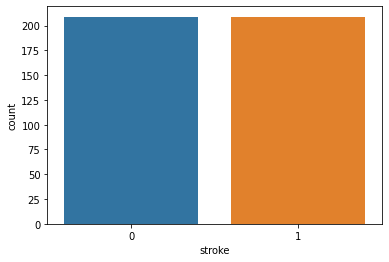

In [27]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
#display(sns.countplot(df,x = "stroke"))
cols = ["age", "avg_glucose_level","bmi","hypertension",	"heart_disease"]
undersmaple=NearMiss(version=3, n_neighbors_ver3=3)
df.dropna(inplace = True)
X_under,y_under=undersmaple.fit_resample(df[cols],df['stroke'])
X_under["stroke"] = list(y_under)
#train_x,test_x,train_y,test_y=train_test_split(df[cols],df['stroke'],random_state=42,test_size=0.25)
#test_x,test_y=smote.fit_resample(test_x,test_y)
display(sns.countplot(X_under,x = "stroke"))
df = X_under

We will use the three continous variables age, glucose level and bmi to as inputs to the PCA. But before we continue we will perform a EDA of these variables

In [28]:
print(df['avg_glucose_level'].nunique())# print the number of unique values of age
display(px.box(df["avg_glucose_level"]))# print the boxplot of age)
display(px.box(data_frame=df , x = 'stroke' , y = 'avg_glucose_level') )
display(px.histogram(df, x = "avg_glucose_level" , color = "stroke"))

416


In [29]:
print(df['bmi'].nunique())# print the number of unique values of age
display(px.box(df["bmi"]))# print the boxplot of age)
display(px.box(data_frame=df , x = 'stroke' , y = 'bmi') )
display(px.histogram(df, x = "bmi" , color = "stroke"))

198


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df[["age", "avg_glucose_level","bmi","hypertension",	"heart_disease"]])

PCA(n_components=3)

In [38]:
pca.explained_variance_ratio_

array([0.95162582, 0.03968159, 0.00862427])

In [39]:
Array = pd.DataFrame(pca.fit_transform(df[["age", "avg_glucose_level","bmi","hypertension",	"heart_disease"]]).tolist(),columns = ["PC1","PC2","PC3"])
Array.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     418 non-null    float64
 1   PC2     418 non-null    float64
 2   PC3     418 non-null    float64
dtypes: float64(3)
memory usage: 9.9 KB


In [40]:
Array["stroke"] = list(df["stroke"])
Array

,PC1,PC2,PC3,stroke
0,-5.009500,26.475030,9.502563,0
1,-86.935234,46.523260,-12.616759,0
2,-5.917974,24.740288,6.318571,0
3,-87.212180,44.830565,-10.916058,0
4,-2.499319,16.385436,9.756842,0
...,...,...,...,...
413,102.231276,1.773378,5.738697,1
414,-60.643995,7.232221,5.121119,1
415,-89.266332,47.294345,-8.626147,1
416,-66.383056,-12.082548,1.849852,1


In [41]:
px.scatter_3d(Array,x = "PC1" , y= "PC2" ,z = "PC3" ,color = "stroke")

Although faint, one can clearly see a linear separation in the data at the 0 of the x-axis. this shows the data will likely be classified using linear algorithms.

## <h2 align="center" id = '3'><font color='green'>Conclusion</h2>


Principal Component Analysis (PCA) is a powerful technique in data analysis and machine learning that can help us identify the underlying patterns in complex datasets. Mastering PCA can greatly enhance your ability to extract insights and make informed decisions from complex data, making it an essential skill for any data scientist or machine learning practitioner.